# Patch Analysis

In [43]:
# Imports
import numpy as np

import pandas
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

from ulmo.plotting import plotting

# Load the output file

In [25]:
f = np.load('mae_patches_t10_p20.npz')
list(f.keys())

['data', 'items']

In [26]:
data = f['data']
items = f['items']
items

array(['meanT', 'stdT', 'mean_diff', 'std_diff', 'max_diff', 'i', 'j'],
      dtype='<U9')

In [27]:
data.shape

(10000, 52, 7)

## Reshape

In [28]:
data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))

# Table me

In [29]:
tbl = pandas.DataFrame(data, columns=items)
tbl.head()

,meanT,stdT,mean_diff,std_diff,max_diff,i,j
0,0.565716,0.124143,-0.149936,0.079534,0.292810,0.0,40.0
1,0.732437,0.050911,-0.053818,0.045282,0.147853,0.0,44.0
2,-0.283329,0.032693,0.009533,0.007569,0.024012,4.0,0.0
3,-0.084868,0.017589,0.011495,0.005283,0.020870,4.0,16.0
4,0.820333,0.015397,0.000356,0.005214,0.008616,4.0,48.0


In [34]:
np.unique(tbl.i).size

16

# Plot something

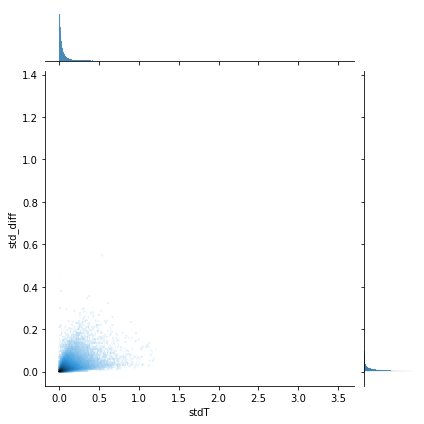

In [31]:
sns.jointplot(data=tbl, x='stdT', y='std_diff', kind='hex', 
              gridsize=250, bins='log')

## Binned stats

In [35]:
nbins = 16
median, x_edge, y_edge, ibins = scipy.stats.binned_statistic_2d(
        tbl.i, tbl.j, tbl.std_diff,
        statistic='median', expand_binnumbers=True, bins=[nbins,nbins])

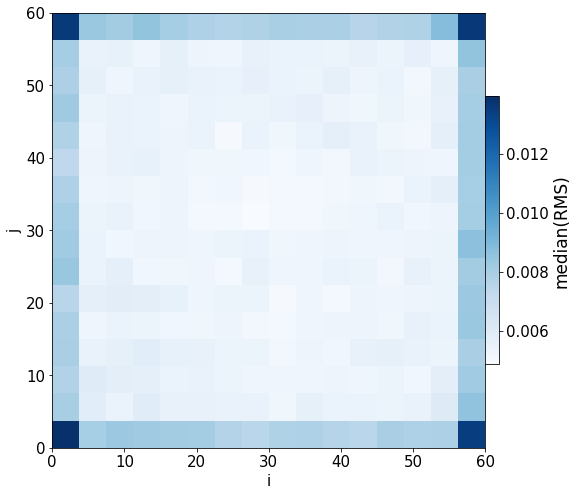

In [44]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

cmap = 'Blues'
cm = plt.get_cmap(cmap)
mplt = ax.pcolormesh(x_edge, y_edge, 
                 median.transpose(),
                 cmap=cm, 
                 vmax=None) 
# Color bar
cbaxes = plt.colorbar(mplt, pad=0., fraction=0.030)
cbaxes.set_label(f'median(RMS)', fontsize=17.)
cbaxes.ax.tick_params(labelsize=15)

# Axes
ax.set_xlabel(r'i')
ax.set_ylabel(r'j')

plotting.set_fontsize(ax, 15)

plt.show()